# 데이터 로드 및 탐색

In [8]:
# 패키지 불러오기
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
path = './data/'
train=pd.read_csv(path + 'train_features.csv')
train_labels=pd.read_csv(path +'train_labels.csv')
test=pd.read_csv(path +'test_features.csv')
submission=pd.read_csv(path +'sample_submission.csv')

In [4]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
train.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,668012.000000,668012.000000,668012.000000,668012.000000,668012.000000,668011.000000,668011.000000,668011.000000
mean,556.176769,299.438432,-0.440758,-0.147302,0.050372,-1.366575,-0.482181,0.995654
std,321.397712,173.215385,0.725190,0.595925,0.467585,61.108435,71.610896,73.568065
min,0.000000,0.000000,-8.561409,-7.976927,-8.064076,-1654.126157,-1594.255615,-1110.114593
25%,278.000000,149.000000,-0.962046,-0.501876,-0.222963,-20.543161,-18.790176,-16.038778
50%,556.000000,299.000000,-0.646936,-0.186617,0.021629,-1.407050,-0.286196,-0.230358
75%,835.000000,449.000000,0.007664,0.155138,0.350512,16.092930,16.611268,16.993522
max,1113.000000,599.000000,8.426799,8.351515,5.144840,1710.543689,2111.656826,1100.814867


In [6]:
# 결측치 확인
train.isnull().sum()

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     1
gy_y     1
gy_z     1
dtype: int64

In [7]:
# id 개수 -> unique 값(0~3124), 각 600개씩 데이터
train['id'].value_counts()

0       600
325     600
328     600
839     600
327     600
       ... 
140     600
651     600
139     600
650     600
1113    212
Name: id, Length: 1114, dtype: int64

In [12]:
train.columns

Index(['id', 'time', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z'], dtype='object')

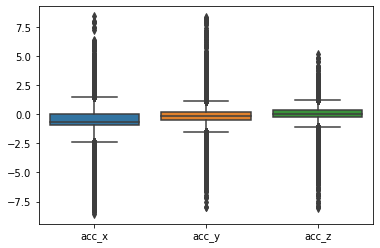

<AxesSubplot:>

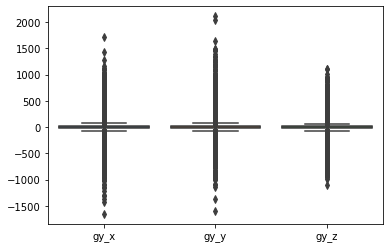

In [19]:
sns.boxplot(data = train[['acc_x', 'acc_y', 'acc_z']])
plt.show()
sns.boxplot(data = train[['gy_x', 'gy_y', 'gy_z']])

In [10]:
# 각 id가 수행한 동작 labels에서 확인함
train_labels 

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


[Text(0, 0, 'Shoulder Press (dumbbell)'),
 Text(1, 0, 'Non-Exercise'),
 Text(2, 0, 'Biceps Curl (band)'),
 Text(3, 0, 'Side Plank Right side'),
 Text(4, 0, 'Plank'),
 Text(5, 0, 'Chest Press (rack)'),
 Text(6, 0, 'Wall Squat'),
 Text(7, 0, 'Russian Twist'),
 Text(8, 0, 'Running (treadmill)'),
 Text(9, 0, 'Pushup (knee or foot variation)'),
 Text(10, 0, 'Wall Ball'),
 Text(11, 0, 'Dynamic Stretch (at your own pace)'),
 Text(12, 0, 'Sit-up (hands positioned behind head)'),
 Text(13, 0, 'Tap Right Device'),
 Text(14, 0, 'Static Stretch (at your own pace)'),
 Text(15, 0, 'Device on Table'),
 Text(16, 0, 'Triceps extension (lying down)'),
 Text(17, 0, 'Elliptical machine'),
 Text(18, 0, 'Burpee'),
 Text(19, 0, 'Walking lunge'),
 Text(20, 0, 'Lateral Raise'),
 Text(21, 0, 'Jump Rope'),
 Text(22, 0, 'Triceps Kickback (knee on bench) (label spans both arms)'),
 Text(23, 0, 'Medicine Ball Slam'),
 Text(24, 0, 'Lunge (alternating both legs, weight optional)'),
 Text(25, 0, 'Fast Alternating Punc

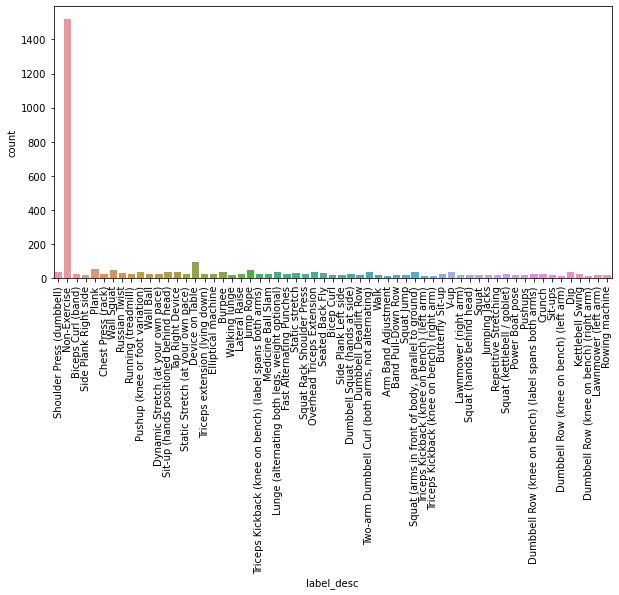

In [49]:

plt.figure(figsize = (10,5)) 
g = sns.countplot(x = 'label_desc', data = train_labels)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [58]:
f'{train_labels.loc[train_labels.label == 26].count()[1]/len(train_labels.label)*100}%'

'48.576%'

48.6%나 non-Exercise임  
non-Exercise 개수가 너무 많음...

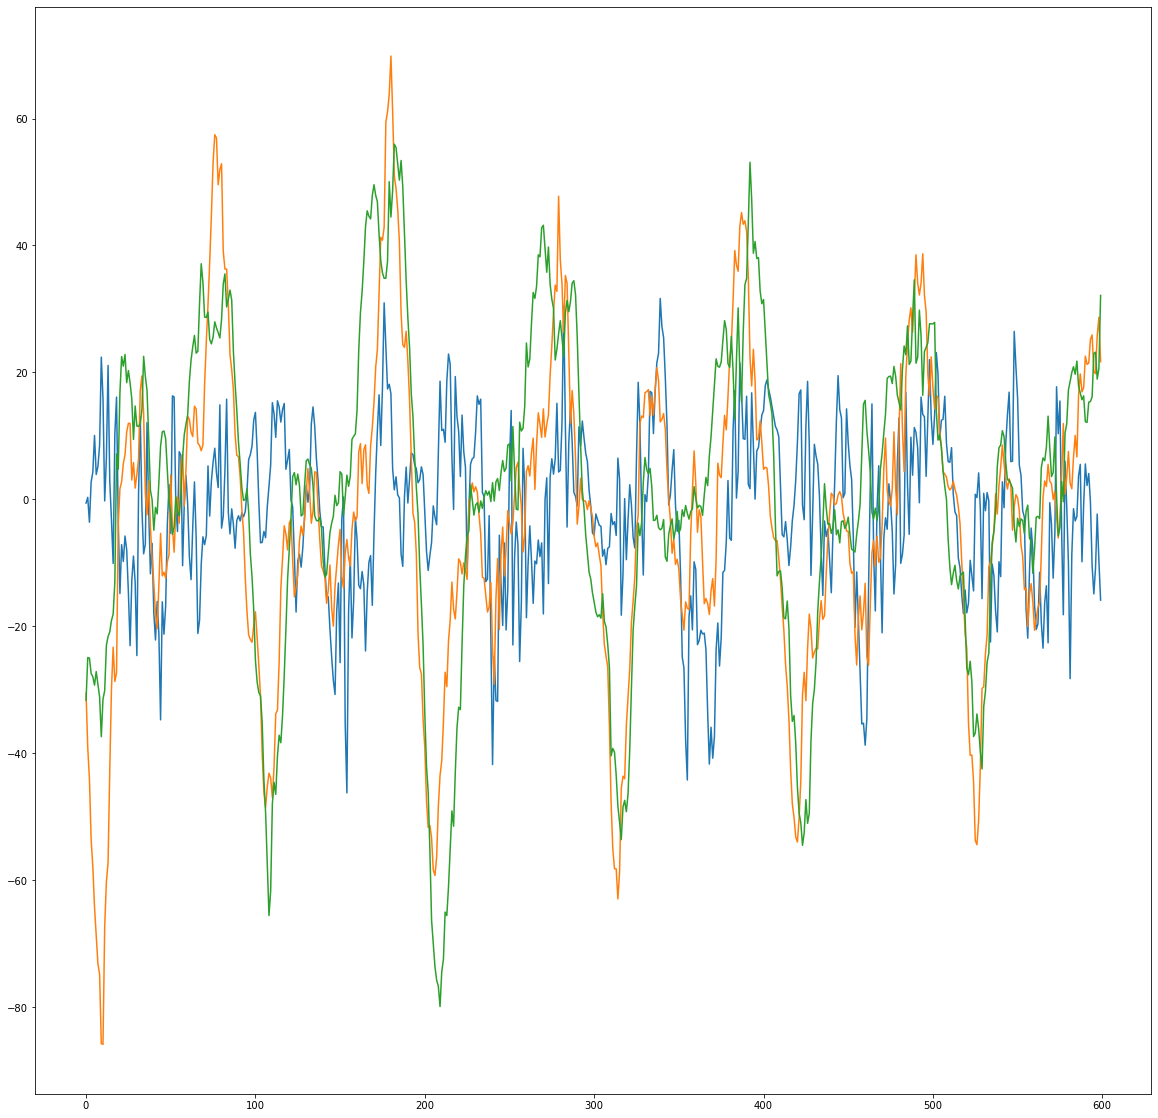

In [99]:
# id 별 동작 흐름 살펴보기
plt.figure(figsize = (20,20)) 
ex=train[train['id']==0].iloc[:,5:]
plt.plot(ex)
plt.show()

<AxesSubplot:>

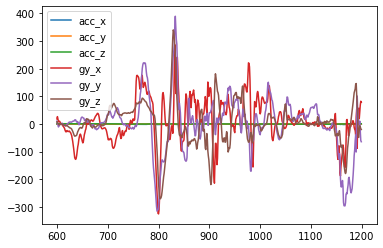

In [60]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

# 데이터 전처리
각 테스트 id 별 어떤 동작인지 분류하는 문제

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

print('tensorflow_version', tf.__version__)
print('keras', keras.__version__)

tensorflow_version 2.5.0
keras 2.5.0


In [78]:
train.iloc[:,0:]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [67]:
# 데이터 전처리 -> id, time 열 제외
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6]) # id 개수, 모션 
X.shape

TensorShape([3125, 600, 6])

In [69]:
# y 데이터 원핫 인코딩
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

# 모델 생성

In [80]:
# 모델 생성
model = Sequential()

# 네트워크 생성
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(61, activation = 'softmax')) # 다중 분류

# compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
hist = model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 6s 290ms/step - loss: 1.9012 - accuracy: 0.5284 - val_loss: 2.3857 - val_accuracy: 0.5008
Epoch 2/30
20/20 [==============================] - 6s 291ms/step - loss: 1.8867 - accuracy: 0.5292 - val_loss: 2.3839 - val_accuracy: 0.4896
Epoch 3/30
20/20 [==============================] - 6s 312ms/step - loss: 1.8651 - accuracy: 0.5304 - val_loss: 2.3768 - val_accuracy: 0.5008
Epoch 4/30
20/20 [==============================] - 6s 301ms/step - loss: 1.8499 - accuracy: 0.5316 - val_loss: 2.3885 - val_accuracy: 0.4944
Epoch 5/30
20/20 [==============================] - 7s 330ms/step - loss: 1.8303 - accuracy: 0.5376 - val_loss: 2.3950 - val_accuracy: 0.4960
Epoch 6/30
20/20 [==============================] - 6s 302ms/step - loss: 1.8154 - accuracy: 0.5392 - val_loss: 2.3858 - val_accuracy: 0.5008
Epoch 7/30
20/20 [==============================] - 6s 299ms/step - loss: 1.7955 - accuracy: 0.5444 - val_loss: 2.4017 - val_accuracy: 0.4912
Epoch 

In [82]:
# test 데이터 전처리
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [86]:
model.evaluate(X, y)

98/98 [==============================] - 4s 45ms/step - loss: 1.9781 - accuracy: 0.5229


[1.978054165840149, 0.5228800177574158]

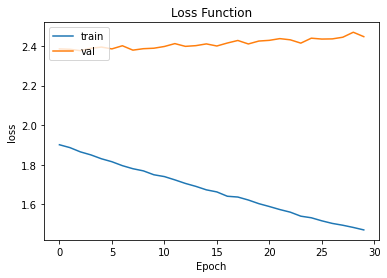

In [89]:

# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Loss Function')
plt.show()

# 모델 예측

In [83]:
prediction=model.predict(test_X)

In [84]:
prediction.shape

(782, 61)